In [ ]:
# 30个频率频道 116*116输入   3种不同3dcnn模型的对比  

In [ ]:
# !pip install import-ipynb
# import import_ipynb

%tensorflow_version 1.x
# !pip install numpy==1.16.1

TensorFlow 1.x selected.


# 初始化

In [1]:

import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.metrics import r2_score, accuracy_score
import matplotlib.pyplot as plt 
from keras.models import Model, Sequential
from keras.layers import Conv1D,Flatten,Conv2D, Dropout, MaxPooling2D, Input,Conv3D, MaxPooling3D, Dense, BatchNormalization, AveragePooling3D
from keras import Input,layers
from keras.layers.merge import concatenate 
from google.colab import drive
from keras.optimizers import Adam,RMSprop,SGD
from keras.wrappers.scikit_learn import KerasClassifier,KerasRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
drive.mount('/content/drive')
# %cp -av fromfolder tofolder
# %cd "/content/drive/My Drive/Newdata/"
# from model_functions import *

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wHAMJtsIEg-PRDZirqcGofFdIk-BEEANIg3A5g-vf8RjtySlSzdGkY
Mounted at /content/drive


# 载入数据

# flipped  30hz  不带control(3600)  3percentage

In [ ]:
patient_order = range(1,25)
order = shuffle(patient_order, random_state = 10)
print(patient_order)
print(order)  
# [14, 18, 20, 5, 2, 22, 19, 15, 23, 17, 24, 13, 11, 6, 9, 7, 1, 3, 8, 12, 21, 10, 16, 4]    random_state =20 
# [6, 2, 8, 3, 12, 13, 22, 14, 15, 4, 23, 7, 19, 11, 21, 24, 9, 20, 17, 18, 1, 16, 5, 10]    random_state =10

tmp = order[0]
A = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/connectivity/flipped_keep30_150_' + str(tmp)+ '.npy',allow_pickle=True)
A = np.reshape(A,(150,30,116,116))
for i in order[1:20]: 
  a = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/connectivity/flipped_keep30_150_' + str(i)+ '.npy',allow_pickle=True)
  a = np.reshape(a,(150,30,116,116))
  A = np.concatenate((A,a), axis = 0)
print(A.shape)
# 前十八个 病人数据做训练data(2700, 30, 116,116)


tmp = order[0]
B = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/two_labels/' + str(tmp)+ '.npy',allow_pickle=True)
for i in order[1:20]: 
  b = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/two_labels/' + str(i)+ '.npy',allow_pickle=True)
  B = np.concatenate((B,b), axis = 0)
print(B.shape)
# 前十八个 病人数据做训练label(2700, 4)

tmp = order[20]
C = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/connectivity/flipped_keep30_150_' + str(tmp)+ '.npy',allow_pickle=True)
C = np.reshape(C,(150,30,116,116))
for i in order[21:]: 
  c = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/connectivity/flipped_keep30_150_' + str(i)+ '.npy',allow_pickle=True)
  c = np.reshape(c,(150,30,116,116))
  C = np.concatenate((C,c), axis = 0)
print(C.shape)
# 后六个人 病人数据做测试data(900, 30, 116,116)

tmp = order[20]
D = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/two_labels/' + str(tmp)+ '.npy',allow_pickle=True)
for i in order[21:]: 
  d = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/two_labels/' + str(i)+ '.npy',allow_pickle=True)
  D = np.concatenate((D,d), axis = 0)
print(D.shape)
# 后六个人 病人数据做测试label(900, 4)

np.save('/content/drive/My Drive/Newdata/ordered_by_patient/train_data_3000_30_116_116', A)
np.save('/content/drive/My Drive/Newdata/ordered_by_patient/train_label_3000_2', B)
np.save('/content/drive/My Drive/Newdata/ordered_by_patient/test_data_600_30_116_116', C)
np.save('/content/drive/My Drive/Newdata/ordered_by_patient/test_label_600_2', D)

# train_data = A
# train_label = B
# test_data = C
# test_label = D

# train_data = np.reshape(train_data,(3000,30,116,116,1))
# test_data = np.reshape(test_data,(600,30,116,116,1)) 

# train_data, train_label = shuffle(train_data,train_label, random_state =10)

# print(train_data.shape)
# print(train_label.shape)
# print(test_data.shape)
# print(test_label.shape)

range(1, 25)
[6, 2, 8, 3, 12, 13, 22, 14, 15, 4, 23, 7, 19, 11, 21, 24, 9, 20, 17, 18, 1, 16, 5, 10]
(3000, 30, 116, 116)
(3000, 2)
(600, 30, 116, 116)
(600, 2)


In [ ]:
lll = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/two_labels/1.npy')
print(lll.shape)

(150, 2)


In [ ]:

data = []
label2 = []
label3 = []
for i in range(1,25):
  b = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/connectivity/flipped_keep30_150_' + str(i)+ '.npy')
  # b = sixtothree_matrix(a)
  c = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/two_labels/' + str(i) + '.npy')  #两个label
  d = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/percent_output_' + str(i) + '.npy')  #三个label
  data.append(b)
  label2.append(c)
  label3.append(d)

# for i in range(1,25):
#   c = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/two_labels/' + str(i) + '.npy')  #两个label
#   d = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/percent_output_' + str(i) + '.npy')  #三个label
#   label2.append(c)
#   label3.append(d)


np.save('/content/drive/My Drive/Newdata/ordered_by_patient/train_data_24_150_30_116_116', data)
np.save('/content/drive/My Drive/Newdata/ordered_by_patient/train_label2_24_150_3', label2)
np.save('/content/drive/My Drive/Newdata/ordered_by_patient/train_label3_24_150_3', label3)



In [2]:
# train_data = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/train_data_24_150_30_116_116.npy')
# label2 = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/train_label2_24_150_3.npy')
# label3 =  np.load('/content/drive/My Drive/Newdata/ordered_by_patient/train_label3_24_150_3.npy')
# test_label = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/test_label_600_3.npy')



train_data = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/train_data_3000_30_116_116.npy')
train_label = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/train_label_3000_2.npy')
test_data = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/test_data_600_30_116_116.npy')
test_label = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/test_label_600_2.npy')

train_data = np.reshape(train_data,(3000,30,116,116,1))
test_data = np.reshape(test_data,(600,30,116,116,1)) 

train_data, train_label = shuffle(train_data,train_label, random_state =10)

In [ ]:
print(train_data.shape)

(3000, 30, 116, 116, 1)


In [ ]:
# 按照病人打乱顺序
Data, Label2, Label3 = shuffle(train_data, label2, label3, random_state = 20)
# Data, Label2, Label3 = shuffle(data, label2, label3, random_state = 20)
# 将shuffle后的数据的前20个病人数据做训练+验证集
train_data = Data[:20]
train_label2 = Label2[:20] 
train_label3 = Label3[:20] 


# 将shuffle后的数据的后4个病人数据做测试集
test_data = Data[20:]
test_label2 = Label2[20:]
test_label3 = Label3[20:]

# train_data = np.array(train_data)
train_data = np.reshape(train_data,(2400,30,116,116,1))

# train_label2 = np.array(train_label2)
train_label2 = np.reshape(train_label2,(2400,2))

# train_label3 = np.array(train_label3)
train_label3 = np.reshape(train_label3,(2400,3))


# test_data = np.array(test_data)
test_data = np.reshape(test_data,(600,30,116,116,1))

# test_label2 = np.array(test_label2)
test_label2 = np.reshape(test_label2,(600,2))

# test_label3 = np.array(test_label3)
test_label3 = np.reshape(test_label3,(600,3))


train_data, train_label = shuffle(train_data, train_label3, random_state = 20)


# train_data = np.reshape(train_data,(3000,30,116,116,1))
# test_data = np.reshape(test_data,(600,30,116,116,1)) 

print(train_data.shape)
print(train_label.shape)
# print(test_data.shape)
# print(test_label.shape)

(2400, 30, 116, 116, 1)
(2400, 3)


# nonflipped全保留数据 不带control(150)  两个class

In [ ]:
patient_order = range(1,25)
order = shuffle(patient_order, random_state = 10)
print(patient_order)
print(order)  
# [14, 18, 20, 5, 2, 22, 19, 15, 23, 17, 24, 13, 11, 6, 9, 7, 1, 3, 8, 12, 21, 10, 16, 4]    random_state =20 
# [6, 2, 8, 3, 12, 13, 22, 14, 15, 4, 23, 7, 19, 11, 21, 24, 9, 20, 17, 18, 1, 16, 5, 10]    random_state =10

tmp = order[0]
A = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/connectivity/nonflipped_all_150_' + str(tmp)+ '.npy',allow_pickle=True)
A = np.reshape(A,(150,30,116,116))
for i in order[1:20]: 
  a = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/connectivity/nonflipped_all_150_' + str(i)+ '.npy',allow_pickle=True)
  a = np.reshape(a,(150,30,116,116))
  A = np.concatenate((A,a), axis = 0)
print(A.shape)
# 前十八个 病人数据做训练data(2700, 30, 116,116)


tmp = order[0]
B = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/4/output_150_4_' + str(tmp)+ '.npy',allow_pickle=True)
for i in order[1:20]: 
  b = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/4/output_150_4_' + str(i)+ '.npy',allow_pickle=True)
  B = np.concatenate((B,b), axis = 0)
print(B.shape)
# 前十八个 病人数据做训练label(2700, 4)

tmp = order[20]
C = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/connectivity/nonflipped_all_150_' + str(tmp)+ '.npy',allow_pickle=True)
C = np.reshape(C,(150,30,116,116))
for i in order[21:]: 
  c = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/connectivity/nonflipped_all_150_' + str(i)+ '.npy',allow_pickle=True)
  c = np.reshape(c,(150,30,116,116))
  C = np.concatenate((C,c), axis = 0)
print(C.shape)
# 后六个人 病人数据做测试data(900, 30, 116,116)

tmp = order[20]
D = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/4/output_150_4_' + str(tmp)+ '.npy',allow_pickle=True)
for i in order[21:]: 
  d = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/4/output_150_4_' + str(i)+ '.npy',allow_pickle=True)
  D = np.concatenate((D,d), axis = 0)
print(D.shape)
# 后六个人 病人数据做测试label(900, 4)

np.save('/content/drive/My Drive/Newdata/ordered_by_patient/train_data_2700_6_116_116_original', A)
np.save('/content/drive/My Drive/Newdata/ordered_by_patient/train_label_2700_25_3', B)
np.save('/content/drive/My Drive/Newdata/ordered_by_patient/test_data_900_6_116_116_original', C)
np.save('/content/drive/My Drive/Newdata/ordered_by_patient/test_label_900_25_3', D)

# train_data = A
# train_label = B
# test_data = C
# test_label = D

# train_data = np.reshape(train_data,(3000,30,116,116,1))
# test_data = np.reshape(test_data,(600,30,116,116,1)) 

# train_data, train_label = shuffle(train_data,train_label, random_state =10)

# print(train_data.shape)
# print(train_label.shape)
# print(test_data.shape)
# print(test_label.shape)

range(1, 25)
[6, 2, 8, 3, 12, 13, 22, 14, 15, 4, 23, 7, 19, 11, 21, 24, 9, 20, 17, 18, 1, 16, 5, 10]
(3000, 30, 116, 116)
(3000, 4)
(600, 30, 116, 116)
(600, 4)
(3000, 30, 116, 116, 1)
(3000, 4)
(600, 30, 116, 116, 1)
(600, 4)


# nonflipped keep30 不带control（150）两个class

In [ ]:
patient_order = range(1,25)
order = shuffle(patient_order, random_state = 10)
print(patient_order)
print(order)  
# [14, 18, 20, 5, 2, 22, 19, 15, 23, 17, 24, 13, 11, 6, 9, 7, 1, 3, 8, 12, 21, 10, 16, 4]    random_state =20 
# [6, 2, 8, 3, 12, 13, 22, 14, 15, 4, 23, 7, 19, 11, 21, 24, 9, 20, 17, 18, 1, 16, 5, 10]    random_state =10

tmp = order[0]
A = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/connectivity/nonflipped_keep30_150_' + str(tmp)+ '.npy',allow_pickle=True)
A = np.reshape(A,(150,30,116,116))
for i in order[1:18]: 
  a = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/connectivity/nonflipped_keep30_150_' + str(i)+ '.npy',allow_pickle=True)
  a = np.reshape(a,(150,30,116,116))
  A = np.concatenate((A,a), axis = 0)
print(A.shape)
# 前十八个 病人数据做训练data(2700, 30, 116,116)


tmp = order[0]
B = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/4/output_150_4_' + str(tmp)+ '.npy',allow_pickle=True)
for i in order[1:18]: 
  b = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/4/output_150_4_' + str(i)+ '.npy',allow_pickle=True)
  B = np.concatenate((B,b), axis = 0)
print(B.shape)
# 前十八个 病人数据做训练label(2700, 4)

tmp = order[18]
C = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/connectivity/nonflipped_keep30_150_' + str(tmp)+ '.npy',allow_pickle=True)
C = np.reshape(C,(150,30,116,116))
for i in order[19:]: 
  c = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/connectivity/nonflipped_keep30_150_' + str(i)+ '.npy',allow_pickle=True)
  c = np.reshape(c,(150,30,116,116))
  C = np.concatenate((C,c), axis = 0)
print(C.shape)
# 后六个人 病人数据做测试data(900, 30, 116,116)

tmp = order[18]
D = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/4/output_150_4_' + str(tmp)+ '.npy',allow_pickle=True)
for i in order[19:]: 
  d = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/4/output_150_4_' + str(i)+ '.npy',allow_pickle=True)
  D = np.concatenate((D,d), axis = 0)
print(D.shape)
# 后六个人 病人数据做测试label(900, 4)

# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/train_data_2700_6_116_116_original', A)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/train_label_2700_25_3', B)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/test_data_900_6_116_116_original', C)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/test_label_900_25_3', D)

train_data = A
train_label = B
test_data = C
test_label = D

train_data = np.reshape(train_data,(2700,30,116,116,1))
test_data = np.reshape(test_data,(900,30,116,116,1)) 

# train_data, train_label = shuffle(train_data,train_label, random_state =10)

print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

range(1, 25)
[6, 2, 8, 3, 12, 13, 22, 14, 15, 4, 23, 7, 19, 11, 21, 24, 9, 20, 17, 18, 1, 16, 5, 10]
(2700, 30, 116, 116)
(2700, 4)
(900, 30, 116, 116)
(900, 4)
(2700, 30, 116, 116, 1)
(2700, 4)
(900, 30, 116, 116, 1)
(900, 4)


# nonflipped保留30%数据 带control(200) 两个class epoch50: 

In [ ]:
patient_order = range(1,25)
order = shuffle(patient_order, random_state = 10)
print(patient_order)
print(order)  
# [14, 18, 20, 5, 2, 22, 19, 15, 23, 17, 24, 13, 11, 6, 9, 7, 1, 3, 8, 12, 21, 10, 16, 4]    random_state =20 
# [6, 2, 8, 3, 12, 13, 22, 14, 15, 4, 23, 7, 19, 11, 21, 24, 9, 20, 17, 18, 1, 16, 5, 10]    random_state =10

tmp = order[0]
A = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/connectivity/nonflipped_keep30_200_' + str(tmp)+ '.npy',allow_pickle=True)
A = np.reshape(A,(200,30,116,116))
for i in order[1:18]: 
  a = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/connectivity/nonflipped_keep30_200_' + str(i)+ '.npy',allow_pickle=True)
  a = np.reshape(a,(200,30,116,116))
  A = np.concatenate((A,a), axis = 0)
print(A.shape)
# 前十八个 病人数据做训练data(2700, 30, 116,116)


tmp = order[0]
B = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/4/output_200_4_' + str(tmp)+ '.npy',allow_pickle=True)
for i in order[1:18]: 
  b = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/4/output_200_4_' + str(i)+ '.npy',allow_pickle=True)
  B = np.concatenate((B,b), axis = 0)
print(B.shape)
# 前十八个 病人数据做训练label(2700, 4)

tmp = order[18]
C = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/connectivity/nonflipped_keep30_200_' + str(tmp)+ '.npy',allow_pickle=True)
C = np.reshape(C,(200,30,116,116))
for i in order[19:]: 
  c = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/connectivity/nonflipped_keep30_200_' + str(i)+ '.npy',allow_pickle=True)
  c = np.reshape(c,(200,30,116,116))
  C = np.concatenate((C,c), axis = 0)
print(C.shape)
# 后六个人 病人数据做测试data(900, 30, 116,116)

tmp = order[18]
D = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/4/output_200_4_' + str(tmp)+ '.npy',allow_pickle=True)
for i in order[19:]: 
  d = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/4/output_200_4_' + str(i)+ '.npy',allow_pickle=True)
  D = np.concatenate((D,d), axis = 0)
print(D.shape)
# 后六个人 病人数据做测试label(900, 4)

# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/train_data_2700_6_116_116_original', A)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/train_label_2700_25_3', B)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/test_data_900_6_116_116_original', C)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/test_label_900_25_3', D)

train_data = A
train_label = B
test_data = C
test_label = D

train_data = np.reshape(train_data,(3600,30,116,116,1))
test_data = np.reshape(test_data,(1200,30,116,116,1)) 

train_data, train_label = shuffle(train_data,train_label, random_state =10)

print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

range(1, 25)
[6, 2, 8, 3, 12, 13, 22, 14, 15, 4, 23, 7, 19, 11, 21, 24, 9, 20, 17, 18, 1, 16, 5, 10]
(3600, 30, 116, 116)
(3600, 4)
(1200, 30, 116, 116)
(1200, 4)
(3600, 30, 116, 116, 1)
(3600, 4)
(1200, 30, 116, 116, 1)
(1200, 4)


# nonflipped全保留数据 带control(200) 两个class epoch50: 

In [ ]:
patient_order = range(1,25)
order = shuffle(patient_order, random_state = 10)
print(patient_order)
print(order)  
# [14, 18, 20, 5, 2, 22, 19, 15, 23, 17, 24, 13, 11, 6, 9, 7, 1, 3, 8, 12, 21, 10, 16, 4]    random_state =20 
# [6, 2, 8, 3, 12, 13, 22, 14, 15, 4, 23, 7, 19, 11, 21, 24, 9, 20, 17, 18, 1, 16, 5, 10]    random_state =10

tmp = order[0]
A = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/connectivity/nonflipped_all_200_' + str(tmp)+ '.npy',allow_pickle=True)
A = np.reshape(A,(200,30,116,116))
for i in order[1:18]: 
  a = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/connectivity/nonflipped_all_200_' + str(i)+ '.npy',allow_pickle=True)
  a = np.reshape(a,(200,30,116,116))
  A = np.concatenate((A,a), axis = 0)
print(A.shape)
# 前十八个 病人数据做训练data(2700, 30, 116,116)


tmp = order[0]
B = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/4/output_200_4_' + str(tmp)+ '.npy',allow_pickle=True)
for i in order[1:18]: 
  b = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/4/output_200_4_' + str(i)+ '.npy',allow_pickle=True)
  B = np.concatenate((B,b), axis = 0)
print(B.shape)
# 前十八个 病人数据做训练label(2700, 4)

tmp = order[18]
C = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/connectivity/nonflipped_all_200_' + str(tmp)+ '.npy',allow_pickle=True)
C = np.reshape(C,(200,30,116,116))
for i in order[19:]: 
  c = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/connectivity/nonflipped_all_200_' + str(i)+ '.npy',allow_pickle=True)
  c = np.reshape(c,(200,30,116,116))
  C = np.concatenate((C,c), axis = 0)
print(C.shape)
# 后六个人 病人数据做测试data(900, 30, 116,116)

tmp = order[18]
D = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/4/output_200_4_' + str(tmp)+ '.npy',allow_pickle=True)
for i in order[19:]: 
  d = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/4/output_200_4_' + str(i)+ '.npy',allow_pickle=True)
  D = np.concatenate((D,d), axis = 0)
print(D.shape)
# 后六个人 病人数据做测试label(900, 4)

# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/train_data_2700_6_116_116_original', A)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/train_label_2700_25_3', B)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/test_data_900_6_116_116_original', C)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/test_label_900_25_3', D)

train_data = A
train_label = B
test_data = C
test_label = D

train_data = np.reshape(train_data,(3600,30,116,116,1))
test_data = np.reshape(test_data,(1200,30,116,116,1)) 

# train_data, train_label = shuffle(train_data,train_label, random_state =10)

print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

# nonflipped 全保留数据 不带control(150)  6hz

In [ ]:
def thirtyhz_to_6(Input1,num): #Input1是输入数据，num是样本数量

  Delta = ((Input1[:,0] + Input1[:,1] + Input1[:,2])/3).reshape(num,1,116,116,1)
  Ceta = ((Input1[:,3] + Input1[:,4] + Input1[:,5] + Input1[:,6])/4).reshape(num,1,116,116,1)
  Lowalfa = ((Input1[:,7] + Input1[:,8] + Input1[:,9])/3).reshape(num,1,116,116,1)
  Highalfa = ((Input1[:,10] + Input1[:,11])/2).reshape(num,1,116,116,1)
  Beta1 =((Input1[:,12] + Input1[:,13] + Input1[:,14] + Input1[:,15] + Input1[:,16] + Input1[:,17] + Input1[:,18] + Input1[:,19] + Input1[:,20])/9).reshape(num,1,116,116,1)
  Beta2 =((Input1[:,21] + Input1[:,22] + Input1[:,23] + Input1[:,24] + Input1[:,25] + Input1[:,26] + Input1[:,27] + Input1[:,28] + Input1[:,29])/9).reshape(num,1,116,116,1)
  New = np.concatenate((Delta,Ceta,Lowalfa,Highalfa,Beta1,Beta2), axis = 1)

  return New

train_data = thirtyhz_to_6(train_data,2700)
print(train_data.shape)

test_data = thirtyhz_to_6(test_data,900)
print(test_data.shape)

train_data, train_label = shuffle(train_data,train_label, random_state =20)

(2700, 6, 116, 116, 1)
(900, 6, 116, 116, 1)


# 模型函数30hz


In [ ]:
#He正态分布初始化方法，参数由0均值，标准差为sqrt(2 / fan_in) 的正态分布产生，其中fan_in权重张量的扇入
def Functional_model():  
   # This returns a tensor# a layer instance is callable on a tensor, and returns a tensor
  x_input = Input(shape=(30,116,116, 1))
  x = layers.Conv3D(8, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='lecun_uniform')(x_input) 
  x = layers.MaxPooling3D(pool_size=(2, 4, 4))(x)
  x = layers.BatchNormalization()(x)
  x= layers.Dropout(0.6)(x)
  x = layers.Conv3D(8, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='lecun_uniform')(x)
  x = layers.AveragePooling3D(pool_size=(2, 4, 4))(x)
  x = layers.BatchNormalization()(x)
  x= layers.Dropout(0.6)(x)
  # x = layers.Conv3D(16, kernel_size=(4, 4, 4), activation='relu', kernel_initializer='lecun_uniform')(x)
  # x = layers.AveragePooling3D(pool_size=(2, 4, 4))(x)
  # x = layers.BatchNormalization()(x)
  # x= layers.Dropout(0.6)(x)
  # x = layers.Conv3D(32, kernel_size=(4, 4, 4), activation='relu', kernel_initializer='lecun_uniform')(x)
  # x = layers.AveragePooling3D(pool_size=(2, 2, 2))(x)
  # x = layers.BatchNormalization()(x)
  # x= layers.Dropout(0.6)(x)
  # x = layers.Conv3D(3, kernel_size=(4, 4, 4), activation='relu', kernel_initializer='lecun_uniform')(x)
  # # x = layers.AveragePooling3D(pool_size=(3, 3, 3))(x)
  # x = layers.BatchNormalization()(x)
  # x = layers.Conv3D(3, kernel_size=(4, 4, 4), activation='relu', kernel_initializer='lecun_uniform')(x)
  # # x = layers.AveragePooling3D(pool_size=(3, 3, 3))(x)
  # x = layers.BatchNormalization()(x)
  # x= layers.Dropout(0.6)(x)
  # x = layers.Conv3D(3, kernel_size=(4, 4, 4), activation='relu', kernel_initializer='lecun_uniform')(x)
  # # x = layers.AveragePooling3D(pool_size=(3, 3, 3))(x)
  # x = layers.BatchNormalization()(x)
  # x= layers.Dropout(0.6)(x)
  # x = layers.Conv3D(3, kernel_size=(4, 4, 4), activation='relu', kernel_initializer='lecun_uniform')(x)
  # # x = layers.AveragePooling3D(pool_size=(3, 3, 3))(x)
  # x = layers.BatchNormalization()(x)
  # x= layers.Dropout(0.6)(x)
  # x = layers.Conv3D(3, kernel_size=(4, 4, 4), activation='relu', kernel_initializer='lecun_uniform')(x)
  # # x = layers.AveragePooling3D(pool_size=(3, 3, 3))(x)
  # x = layers.BatchNormalization()(x)
  # x= layers.Dropout(0.6)(x)
  x = layers.Flatten()(x)
  x = layers.Dense(1024, activation='relu', kernel_initializer='lecun_uniform')(x) 
  x = layers.Dense(512, activation='relu', kernel_initializer='lecun_uniform')(x) 
  # x = layers.Dense(8, activation='relu', kernel_initializer='lecun_uniform')(x) 
  
  y = layers.Dense(2,  name = 'y')(x)
   

  # This creates a model that includes
  model = Model(inputs=x_input, outputs=y)
  model.summary() 
  # plot_model(model, to_file='/content/drive/My Drive/images/3dcnn.png', show_shapes=True, show_layer_names=True)
  from keras.optimizers import RMSprop,Adam,SGD
  model.compile(optimizer = RMSprop(learning_rate=0.0001, momentum=0.9),
              loss = 'mean_squared_error',
              metrics = ['mae'])


  return model 

# 模型函数6hz

In [ ]:
#He正态分布初始化方法，参数由0均值，标准差为sqrt(2 / fan_in) 的正态分布产生，其中fan_in权重张量的扇入
def Functional_model():  
   # This returns a tensor# a layer instance is callable on a tensor, and returns a tensor
  x_input = Input(shape=(6,116,116, 1))
  x = layers.Conv3D(3, kernel_size=(2, 4, 4), activation='relu', kernel_initializer='lecun_uniform')(x_input) 
  x = layers.MaxPooling3D(pool_size=(1, 2, 2))(x)
  x = layers.BatchNormalization()(x)
  # x= layers.Dropout(0.6)(x)
  x = layers.Conv3D(3, kernel_size=(2, 4, 4), activation='relu', kernel_initializer='lecun_uniform')(x)
  x = layers.AveragePooling3D(pool_size=(1, 2, 2))(x)
  x = layers.BatchNormalization()(x)
  x = layers.Flatten()(x)
  # x = layers.Dense(1024, activation='relu', kernel_initializer='lecun_uniform')(x) 
  # x = layers.Dense(512, activation='relu', kernel_initializer='lecun_uniform')(x) 
  # x = layers.Dense(8, activation='relu', kernel_initializer='lecun_uniform')(x) 
  
  y = layers.Dense(3, activation='sigmoid', name = 'y')(x)
  # This creates a model that includes
  model = Model(inputs=x_input, outputs=y)
  model.summary() 
  # plot_model(model, to_file='/content/drive/My Drive/images/3dcnn.png', show_shapes=True, show_layer_names=True)
  from keras.optimizers import RMSprop,Adam,SGD
  model.compile(optimizer = RMSprop(learning_rate=0.0001, momentum=0.9),
              loss = 'mean_squared_error',
              metrics = ['mae'])

  return model 

# 跑模型

In [ ]:
model = Functional_model()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 30, 116, 116, 1)] 0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 28, 114, 114, 8)   224       
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 14, 28, 28, 8)     0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 28, 28, 8)     32        
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 28, 28, 8)     0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 12, 26, 26, 8)     1736      
_________________________________________________________________
average_pooling3d_1 (Average (None, 6, 6, 6, 8)       

In [ ]:

num_epochs = 50
batchsize = 64

history = model.fit(train_data[:2400], train_label[:2400], epochs=num_epochs, batch_size=batchsize, verbose=1,validation_data=(train_data[2400:], train_label[2400:]))


Epoch 1/50
38/38 [==============================] - 7s 178ms/step - loss: 0.8867 - mae: 0.6455 - val_loss: 0.1941 - val_mae: 0.4191
Epoch 2/50
38/38 [==============================] - 5s 130ms/step - loss: 0.0662 - mae: 0.1965 - val_loss: 0.1362 - val_mae: 0.3417
Epoch 3/50
38/38 [==============================] - 5s 130ms/step - loss: 0.0294 - mae: 0.1351 - val_loss: 0.1081 - val_mae: 0.2879
Epoch 4/50
38/38 [==============================] - 5s 129ms/step - loss: 0.0224 - mae: 0.1176 - val_loss: 0.0487 - val_mae: 0.1832
Epoch 5/50
38/38 [==============================] - 5s 129ms/step - loss: 0.0187 - mae: 0.1074 - val_loss: 0.0201 - val_mae: 0.1103
Epoch 6/50
38/38 [==============================] - 5s 129ms/step - loss: 0.0168 - mae: 0.1025 - val_loss: 0.0221 - val_mae: 0.1176
Epoch 7/50
38/38 [==============================] - 5s 129ms/step - loss: 0.0156 - mae: 0.0985 - val_loss: 0.0580 - val_mae: 0.2084
Epoch 8/50
38/38 [==============================] - 5s 128ms/step - loss: 0.

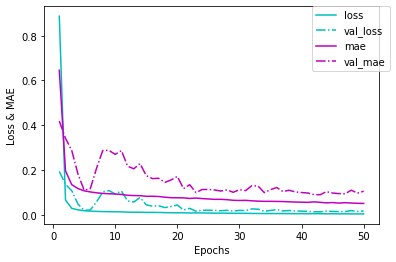

In [ ]:
loss = history.history['loss']
mae = history.history['mae']
# mae_history = history.history['y3_accuracy']
val_loss = history.history['val_loss']
val_mae = history.history['val_mae']

epochs = range(1,len(loss) +1)
plt.plot(epochs, loss, 'c', label='loss')
plt.plot(epochs, val_loss, 'c-.', label='val_loss')

plt.plot(epochs, mae, 'm', label='mae')
plt.plot(epochs, val_mae, 'm-.', label='val_mae')

plt.legend(bbox_to_anchor=(0.8, 1), loc='upper left', borderaxespad=0.)

plt.xlabel('Epochs')
plt.ylabel('Loss & MAE')
# plt.plot(epochs, mae_history, 'm', label='mae')

# plt.savefig('/content/drive/My Drive/images/3dcnn/3d_loss_mse5.png' ,dpi=800)

In [ ]:

# 这部分就是各个模型在测试集的表现
newx = test_data 

m1 = model.predict(newx) * 100



In [ ]:
# m = model2.predict(train_data[200:201])
tttt = range(499,501)
print(test_label[tttt])
print(m1[tttt])
# print(m5[tttt])
# print(m)

[[0.44217687 0.55782313]
 [0.43310658 0.56689342]]
[[46.133907 52.13213 ]
 [35.118    60.774864]]


In [ ]:
# r = r2_score(test_label, m/100, multioutput='raw_values')
# r11 = r2_score(train_label, model.predict(train_data), multioutput='raw_values')
r112 = r2_score(test_label, model.predict(test_data), multioutput='raw_values')
# r22 = r2_score(test_label, m2/100, multioutput='raw_values')
# r22 = r2_score(train_label, model2.predict(train_data), multioutput='raw_values')
# r33 = r2_score(train_label, model3.predict(train_data), multioutput='raw_values')
# r44 = r2_score(train_label, model4.predict(train_data), multioutput='raw_values')
# r55 = r2_score(train_label, model5.predict(train_data), multioutput='raw_values')
# print("training r2",r11)
print("testing r2",r112)
# print(r22)
# print(r33)
# print(r44)
# print(r55)
# print(r2)

In [ ]:
def calculate_mse(predict):   #对比三种视觉情况 每个model的mse  
  nums = 600 #测试集数量
  y_data_c1 = test_label[:,0] 
  y_data_c2 = test_label[:,1] 
  # y_data_c3 = test_label[:,2] 
  y_predict1_c1 = predict[:,0]/100
  y_predict1_c2 = predict[:,1]/100
  # y_predict1_c3 = predict[:,2]/100
  tmp1 = 0
  tmp2 = 0
  tmp3 = 0
  for i in range(nums):
    tmp1 = tmp1 + (y_data_c1[i]- y_predict1_c1[i])**2
    tmp2 = tmp2 + (y_data_c2[i]- y_predict1_c2[i])**2
    # tmp3 = tmp3 + (y_data_c3[i]- y_predict1_c3[i])**2
  c1 = tmp1/nums
  c2 = tmp2/nums
  # c3 = tmp3/nums
  # c1 = K.mean(K.square( y_data_c1- y_predict1_c1), axis=-1)
  # c2 = K.mean(K.square( y_data_c2- y_predict1_c2), axis=-1)
  # c3 = K.mean(K.square( y_data_c3- y_predict1_c3), axis=-1)
  return c1, c2 
# Model = calculate_mse(m)
Model1 = calculate_mse(m1)
# Model2 = calculate_mse(m2)
# Model3 = calculate_mse(m3)
# Model4 = calculate_mse(m4)
# Model5 = calculate_mse(m5)

# print(Model)
print(Model1)
# print(Model2)
# print(Model3)
# print(Model4)
# print(Model5)

(0.013625092833898692, 0.0159671984265448)


# 测试结果

In [ ]:
tm = model.predict(test_data)   #预测测试集label

num = 600
for i in range(num): #将测试集预测label转化为0,1
  for j in range(4):
    if tm[i,j]>= 0.5:
      tm[i,j] = 1
    if tm[i,j]<0.5:
      tm[i,j] = 0
print(tm[145:155])

Test_label = np.zeros((num,4))  #将测试集真实label放进array
for i in range(num):
  for j in range(4):
    Test_label[i,j] = test_label[i,j]


[[0. 1. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]
 [0. 1. 1. 1.]
 [1. 1. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 0. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 0. 0.]]


In [ ]:

ttt = accuracy_score(Test_label.reshape([num*4]),tm.reshape([num*4]))
print(ttt)


0.43472222222222223


In [ ]:
test = model.evaluate(test_data, [test_label[:,0],test_label[:,1],test_label[:,2],test_label[:,3]
                                  # ,test_label[:,4] ,test_label[:,5],test_label[:,6],test_label[:,7],
                                #  test_label[:,8],test_label[:,9],test_label[:,10],test_label[:,11],test_label[:,12],test_label[:,13],test_label[:,14],test_label[:,15]
                                #   ,test_label[:,16],test_label[:,17],test_label[:,18],test_label[:,19],test_label[:,20],test_label[:,21],test_label[:,22],test_label[:,23],
                                #  test_label[:,24]
                                  ], verbose=0)
# print(test)
average = 5
mean = np.mean(test[average:])
print(len(test[average:]))

print(mean)

4
0.4125000014901161


In [ ]:
model.predict(test_data[899:900])

[array([[1.0000000e+00, 2.8864263e-25, 2.0647243e-11]], dtype=float32),
 array([[1.9982869e-17, 3.2378728e-20, 1.0000000e+00]], dtype=float32),
 array([[1.0000000e+00, 8.8592655e-10, 3.5325257e-10]], dtype=float32),
 array([[4.779138e-08, 8.480343e-18, 1.000000e+00]], dtype=float32)]

In [ ]:
print(test_label[899:900])

[[[0 0 1]
  [1 0 0]
  [0 0 1]
  [1 0 0]]]
